In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
sns.set_palette("husl")
sns.set_style('ticks')

In [2]:
obs = np.array([7, 11, 9, 9, 8, 11, 9, 9, 8, 7, 11, 8, 9, 9, 11, 7, 10, 9, 10, 9, 7, 8, 9, 10, 13])

In [3]:
mu = np.mean(obs)
mu

9.12

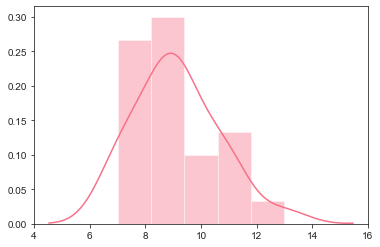

In [4]:
sns.distplot(obs)

In [5]:
from scipy.stats import poisson

In [6]:
syn = poisson.rvs(mu, size=2000)

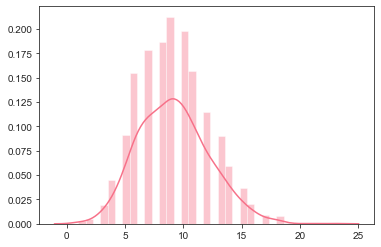

In [7]:
sns.distplot(syn)

In [8]:
from scipy.spatial.distance import cdist

In [9]:
distances = np.zeros(shape=(8,100))


In [10]:
for i in range(1, distances.shape[0] + 1):
    for j in range(1, distances.shape[1] + 1):
        distances[i-1, j-1] = np.log(cdist(np.zeros(shape=(1, j)),
                                          np.ones(shape=(1, j)),
                                          metric='minkowski', p=1)[0][0])

In [11]:
cords = [(2, 4),
        (-3, 8),
        (1, 1)]
cdist(cords, cords, metric='euclidean')

array([[0.        , 6.40312424, 3.16227766],
       [6.40312424, 0.        , 8.06225775],
       [3.16227766, 8.06225775, 0.        ]])

# Wisconsin dataset

In [12]:
bc_dataset_columns = ['id','diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 
 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 
 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
 'radius_se','texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 
 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 
 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 
 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

df = pd.read_csv('wdbc.data', index_col=0, names=bc_dataset_columns).fillna(0.0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


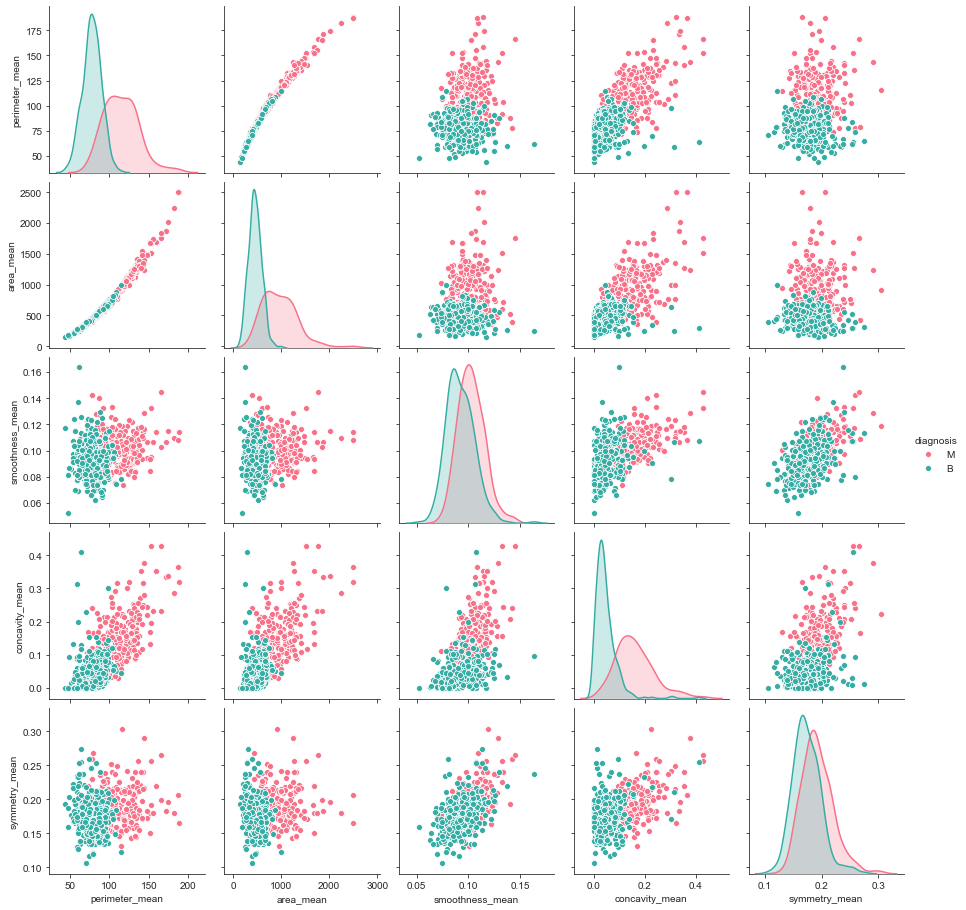

In [13]:
vars_ = ['perimeter_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean']
sns.pairplot(df, vars=vars_, hue='diagnosis', palette='husl')

## TSNE

In [14]:
from sklearn.manifold import TSNE

cdf = df.drop(['diagnosis'], axis=1)

tsne = TSNE(n_components=2, perplexity=10, random_state=1000)
data_tsne = tsne.fit_transform(cdf)

df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=cdf.index)
dff = pd.concat([df, df_tsne], axis=1)

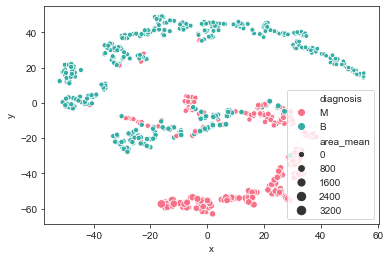

In [15]:
sns.scatterplot(x='x', y='y', data=dff, hue='diagnosis', palette='husl',
               size='area_mean')

## KMeans

In [16]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, max_iter=1000, random_state=1000)
Y_pred = km.fit_predict(cdf)

dff['preds'] = Y_pred

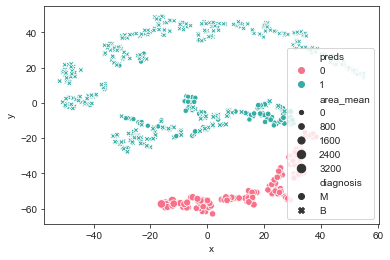

In [17]:
sns.scatterplot(x='x', y='y', data=dff, hue='preds', palette='husl',
               size='area_mean', style='diagnosis')

# Evaluation of KMeans

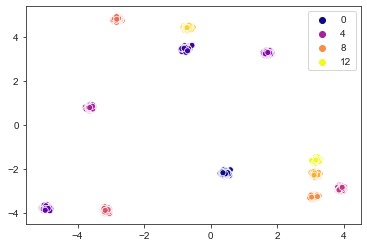

In [18]:
from sklearn.datasets import make_blobs

X, Y = make_blobs(n_samples=2000, n_features=2, centers=12, 
                  cluster_std=0.05, center_box=[-5, 5], random_state=100)

sns.scatterplot(X[:,0], X[:,1], hue=Y, palette='plasma')

### Inertia

In [19]:
inertias = []

for i in range(2, 21):
    km = KMeans(n_clusters=i, max_iter=1000, random_state=1000)
    km.fit(X)
    inertias.append(km.inertia_)

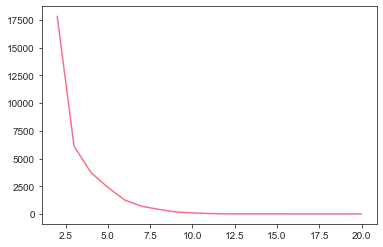

In [20]:
sns.lineplot(range(2,21), inertias)

### Silhouette plot

[Hands-on Unsupervised Learning](https://www.packtpub.com/big-data-and-business-intelligence/hands-unsupervised-learning-python):

The most common method to assess the performance of a clustering algorithm without knowledge of the ground truth is the silhouette score. It provides both a per-sample index and a global graphical representation that shows the level of internal coherence and separation of the clusters. In order to compute the score, we need to introduce two auxiliary measures. The first one is the average intra-cluster distance of a sample $x_i \in Kj$ assuming the cardinality of $|K_j| = n(j)$:

$$
a(\bar{x}_i) = \frac{1}{n(j)} \sum_t d(\bar{x}_i, \bar{x}_t) \forall \bar{x}_t \in K_j
$$

For K-means, the distance is assumed to be Euclidean, but there are no specific limitations. Of course, $d(\bullet)$ must be the same distance function employed in the clustering procedure. 

Given a sample $x_i \in K_j$, let's denote the nearest cluster as $K_c$. In this way, we can also define the smallest nearest-cluster distance (as the average nearest-cluster distance):

$$
b(\bar{x}_i) = \frac{1}{n(c)} \sum_t d(\bar{x}_i, \bar{x}_t) \forall \bar{x}_t \in K_c
$$

With these two measures, we can define the silhouette score for $x_i \in X$:

$$
s(\bar{x}_i) = \frac{b(\bar{x}_i) - a(\bar{x}_i)}{max(a(\bar{x}_i), b(\bar{x}_i))}
$$

The score $s(\bullet) \in (-1, 1)$. When $s(\bullet) \rightarrow -1$, it means that $b(\bullet) << a(\bullet)$, hence the sample $x_i \in K_j$ is closer to the nearest cluster $K_c$ than to the other samples assigned to $K_j$. This condition indicates a wrong assignment. Conversely, when $s(\bullet) \rightarrow 1$, $b(\bullet) >> a(\bullet)$, so the sample $x_i$ is much closer to its neighbors (belonging to the same cluster) than to any other point assigned to the nearest cluster. Clearly, this is an optimal condition and the reference to employ when fine-tuning an algorithm. However, as this index is not global, it's helpful to introduce silhouette plots, which show the scores achieved by each sample, grouped by cluster and sorted in descending order. 

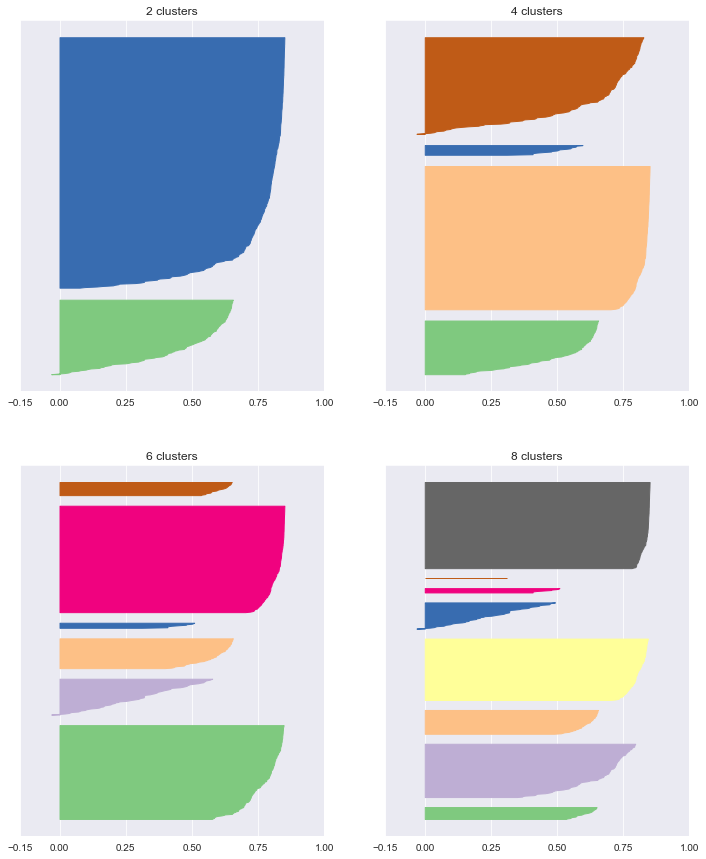

In [21]:
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
sns.set_style('darkgrid')

nb_clusters = [2, 4, 6, 8]
mapping = [(0, 0), (0, 1), (1, 0), (1, 1)]

# Show the silhouette plots
fig, ax = plt.subplots(2, 2, figsize=(12, 15))

for i, n in enumerate(nb_clusters):
    km = KMeans(n_clusters=n, random_state=1000)
    Y = km.fit_predict(cdf)
    df_km = pd.DataFrame(Y_pred, columns=['prediction'], index=cdf.index)
    kmdff = pd.concat([dff, df_km], axis=1)

    silhouette_values = silhouette_samples(cdf, kmdff['prediction'])

    ax[mapping[i]].set_xticks([-0.15, 0.0, 0.25, 0.5, 0.75, 1.0])
    ax[mapping[i]].set_yticks([])
    ax[mapping[i]].set_title('%d clusters' % n)
    ax[mapping[i]].set_xlim([-0.15, 1])
    y_lower = 20

    for t in range(n):
        ct_values = silhouette_values[Y == t]
        ct_values.sort()

        y_upper = y_lower + ct_values.shape[0]

        color = cm.Accent(float(t) / n)
        ax[mapping[i]].fill_betweenx(np.arange(y_lower, y_upper), 0, ct_values, facecolor=color, edgecolor=color)

        y_lower = y_upper + 20

plt.show()

### Contingency matrix

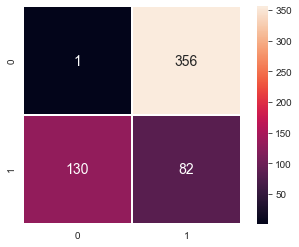

In [22]:
from sklearn.metrics.cluster import contingency_matrix

cmat = contingency_matrix(
            kmdff['diagnosis'].apply(lambda x: 0 if x=='B' else 1),
            kmdff['prediction']
        )

sns.heatmap(cmat, annot=True, fmt='d', linewidth=.5, square=True, 
           annot_kws={'fontsize': 14})
plt.show()

# Spectral clustering

In [23]:
nb_samples = 2000

X0 = np.expand_dims(np.linspace(-2 * np.pi, 2 * np.pi, nb_samples), axis=1)
Y0 = -2.0 - np.cos(2.0 * X0) + np.random.uniform(0.0, 2.0, size=(nb_samples, 1))

X1 = np.expand_dims(np.linspace(-2 * np.pi, 2 * np.pi, nb_samples), axis=1)
Y1 = 2.0 - np.cos(2.0 * X0) + np.random.uniform(0.0, 2.0, size=(nb_samples, 1))

data_0 = np.concatenate([X0, Y0], axis=1)
data_1 = np.concatenate([X1, Y1], axis=1)
data = np.concatenate([data_0, data_1], axis=0)

In [24]:
X0.shape

(2000, 1)

In [25]:
data_0.shape

(2000, 2)

In [26]:
data.shape

(4000, 2)

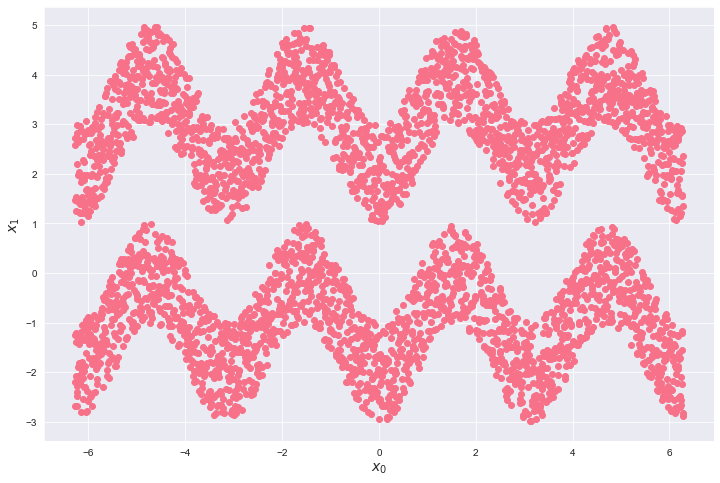

In [27]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(data[:, 0], data[:, 1])
ax.set_xlabel(r'$x_0$', fontsize=14)
ax.set_ylabel(r'$x_1$', fontsize=14)

plt.show()

In [28]:
from sklearn.cluster import SpectralClustering, KMeans

km = KMeans(n_clusters=2, random_state=1000)
sc = SpectralClustering(n_clusters=2, affinity='rbf', gamma=2.0, random_state=1000)

Y_pred_km = km.fit_predict(data)
Y_pred_sc = sc.fit_predict(data)

In [29]:
Y_pred_sc

array([1, 1, 1, ..., 0, 0, 0])

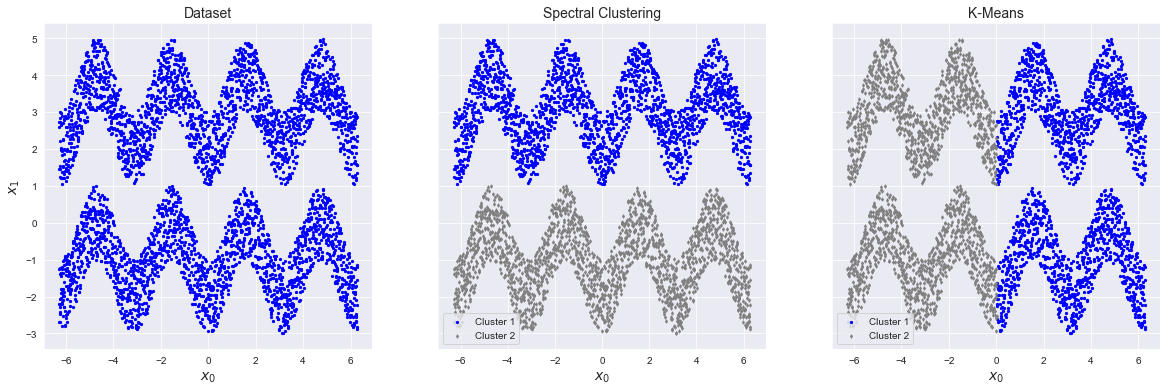

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

ax[0].scatter(data[:, 0], data[:, 1], c='b', s=5)

ax[1].scatter(data[Y_pred_sc == 0, 0], data[Y_pred_sc == 0, 1], marker='o', s=5, c='b', label='Cluster 1')
ax[1].scatter(data[Y_pred_sc == 1, 0], data[Y_pred_sc == 1, 1], marker='d', s=5, c='gray', label='Cluster 2')

ax[2].scatter(data[Y_pred_km == 0, 0], data[Y_pred_km == 0, 1], marker='o', c='b', s=5, label='Cluster 1')
ax[2].scatter(data[Y_pred_km == 1, 0], data[Y_pred_km == 1, 1], marker='d', c='gray', s=5, label='Cluster 2')

ax[0].set_title('Dataset', fontsize=14)
ax[0].set_xlabel(r'$x_0$', fontsize=14)
ax[0].set_ylabel(r'$x_1$', fontsize=14)

ax[1].set_title('Spectral Clustering', fontsize=14)
ax[1].set_xlabel(r'$x_0$', fontsize=14)
ax[1].legend()

ax[2].set_title('K-Means', fontsize=14)
ax[2].set_xlabel(r'$x_0$', fontsize=14)
ax[2].legend()

plt.show()

# Absenteeism dataset

In [31]:
df = pd.read_csv('Absenteeism_at_work.csv', sep=';', index_col=0).fillna(0.0)
df.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,,,,,,,,,,,,,,,,,,,,
11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [32]:
df.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

One-hot encode categorical columns:

In [33]:
cdf = pd.get_dummies(df, columns=['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Disciplinary failure', 'Education', 'Social drinker', 'Social smoker'])

# cdf = cdf.drop(labels=['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Disciplinary failure', 'Education', 'Social drinker', 'Social smoker']).astype(np.float64)


In [34]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler(with_std=False)
sdf = ss.fit_transform(cdf)

In [35]:
sdf.shape

(740, 72)

In [36]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=15, random_state=1000)
data_tsne = tsne.fit_transform(sdf)

cdf['x'] = data_tsne[:,0]
cdf['y'] = data_tsne[:,1]

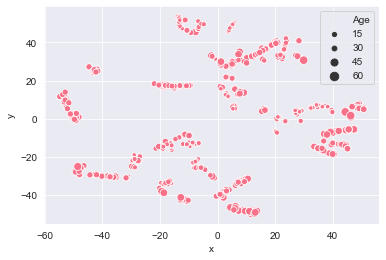

In [37]:
sns.scatterplot('x', 'y', data=cdf, size='Age')

### DBSCAN

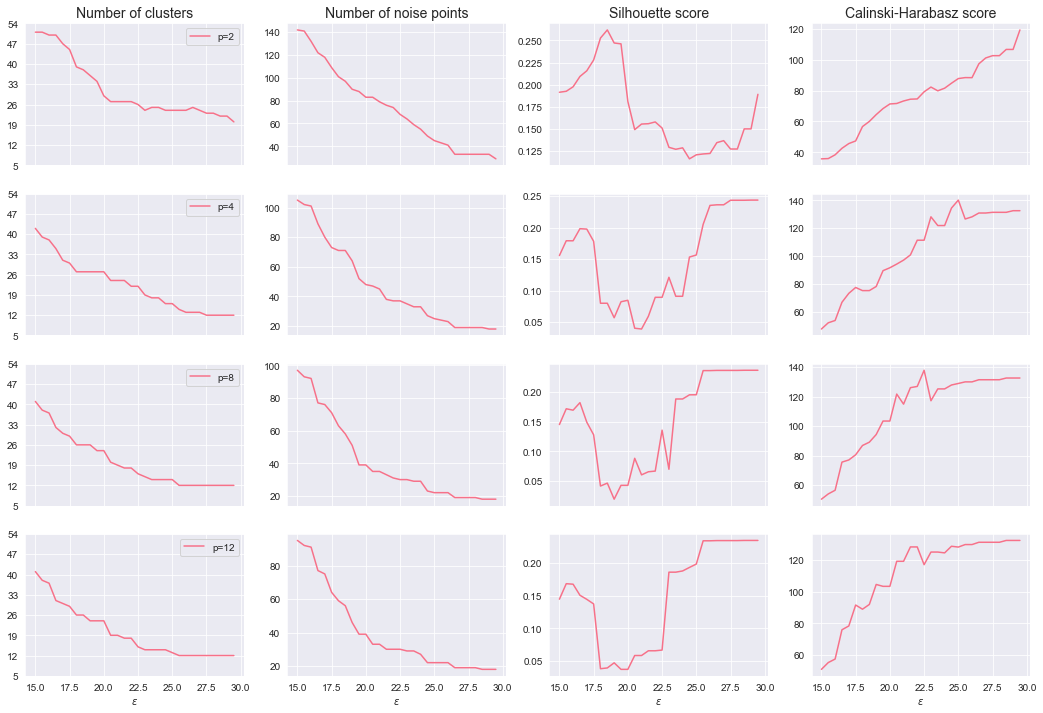

In [38]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.metrics.pairwise import pairwise_distances

# Perform the preliminary analysis
n_clusters = []
n_noise_points = []
silhouette_scores = []
calinski_harabaz_scores = []

for p in [2, 4, 8, 12]:
    n_clusters_p = []
    n_noise_points_p = []
    silhouette_scores_p = []
    calinski_harabaz_scores_p = []

    for eps in np.arange(15, 30, 0.5):
        dst = DBSCAN(eps=eps, min_samples=3, metric='minkowski', p=p)
        Y_pred_t = dst.fit_predict(sdf)

        n_clusters_p.append(np.max(Y_pred_t) + 1)
        n_noise_points_p.append(np.sum(Y_pred_t == -1))
        silhouette_scores_p.append(silhouette_score(cdf, Y_pred_t, metric='minkowski', p=p))
        calinski_harabaz_scores_p.append(calinski_harabasz_score(cdf, Y_pred_t))

    n_clusters.append(n_clusters_p)
    n_noise_points.append(n_noise_points_p)
    silhouette_scores.append(silhouette_scores_p)
    calinski_harabaz_scores.append(calinski_harabaz_scores_p)

# Show the results of the preliminary analysis
fig, ax = plt.subplots(4, 4, figsize=(18, 12), sharex=True)

for idx, p in enumerate([2, 4, 8, 12]):
    x = np.arange(15, 30, 0.5)

    ax[idx, 0].plot(x, n_clusters[idx], label='p={}'.format(p))
    ax[idx, 1].plot(x, n_noise_points[idx], label='p={}'.format(p))
    ax[idx, 2].plot(x, silhouette_scores[idx], label='p={}'.format(p))
    ax[idx, 3].plot(x, calinski_harabaz_scores[idx], label='p={}'.format(p))

ax[0, 0].set_title('Number of clusters', fontsize=14)
ax[0, 1].set_title('Number of noise points', fontsize=14)
ax[0, 2].set_title('Silhouette score', fontsize=14)
ax[0, 3].set_title('Calinski-Harabasz score', fontsize=14)

for i in range(4):
    ax[i, 0].set_yticks(np.arange(5, 60, 7))
    ax[i, 0].legend()
    ax[3, i].set_xlabel(r'$\epsilon$')

plt.show()

In [39]:
dst = DBSCAN(eps=35, min_samples=3, metric='minkowski', p=12)
Y_preds = dst.fit_predict(sdf)

In [40]:
# Cluster labels
np.random.choice(Y_preds, size=10)

array([0, 1, 1, 0, 2, 1, 0, 0, 0, 6], dtype=int64)

$-1$ are noise points.

In [41]:
np.unique(Y_preds)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [42]:
silhouette_score(cdf, Y_preds, metric='minkowski', p=4)

0.29403521547509565

In [43]:
calinski_harabasz_score(cdf, Y_preds)

187.23243730203532

In [44]:
np.max(np.unique(Y_preds))

6

In [45]:
data_tsne[Y_preds == 6]

array([[29.859442, 30.735506],
       [29.87933 , 30.71668 ],
       [29.913301, 30.672949]], dtype=float32)

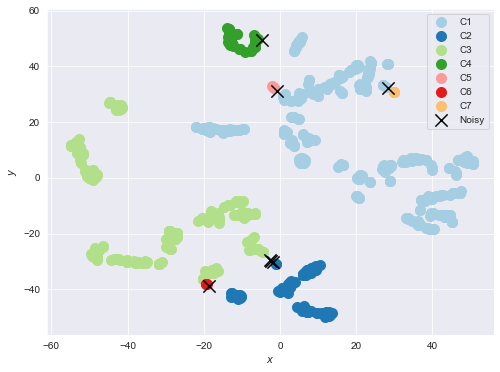

In [46]:
fig, ax = plt.subplots(figsize=(8, 6))

for i in range(np.max(np.unique(Y_preds)) + 1):
    ax.scatter(data_tsne[Y_preds == i, 0], data_tsne[Y_preds == i, 1],
              s=100, c=np.array([cm.Paired(i)]), label='C{}'.format(i + 1))
    
ax.scatter(data_tsne[Y_preds == -1, 0], data_tsne[Y_preds == -1, 1],
          marker='x', c='black', s=150, label='Noisy')

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.legend()

plt.show()

In [47]:
np.array([5, 3]).dot(np.array([1,0]))

5

In [48]:
data_tsne

array([[ 23.382133,  37.86174 ],
       [ 12.597538, -48.675266],
       [-52.91864 ,  10.684803],
       ...,
       [  5.679304, -47.757572],
       [ 36.31085 , -15.49113 ],
       [-48.532093, -25.007662]], dtype=float32)

# Playing with Affinity Propagation

In [49]:
from sklearn.cluster import AffinityPropagation

af = AffinityPropagation(preference=-500).fit(data_tsne)

In [50]:
n_clusters_ = len(af.cluster_centers_indices_)

In [51]:
labels = af.labels_

In [52]:
cluster_centers_indices = af.cluster_centers_indices_

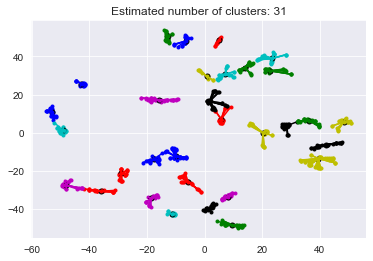

In [53]:
# code from sklearn doc
from itertools import cycle

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = data_tsne[cluster_centers_indices[k]]
    plt.plot(data_tsne[class_members, 0], data_tsne[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=5)
    for x in data_tsne[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Matrix calculations for AP

In [54]:
X =np.matrix('3, 4, 3, 2, 1;4, 3, 5, 1, 1;3, 5, 3, 3, 3;2, 1, 3, 3, 2;1, 1, 3, 2, 3')
X

matrix([[3, 4, 3, 2, 1],
        [4, 3, 5, 1, 1],
        [3, 5, 3, 3, 3],
        [2, 1, 3, 3, 2],
        [1, 1, 3, 2, 3]])

In [55]:
from scipy.spatial.distance import pdist, squareform

In [59]:
similarity = squareform(pdist(X, metric=lambda u,v: -sum((u-v)**2)))
similarity

array([[  0.,  -7.,  -6., -12., -17.],
       [ -7.,   0., -17., -17., -22.],
       [ -6., -17.,   0., -18., -21.],
       [-12., -17., -18.,   0.,  -3.],
       [-17., -22., -21.,  -3.,   0.]])

In [60]:
n = m = similarity.shape[0]

In [61]:
m

5

In [62]:
availability = np.zeros((n,m))
availability

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [63]:
max(availability[0,k] + similarity[0,k] for k in range(m))

0.0

In [64]:
responsibility = np.zeros((n,n))

for i in range(n):
    for k in range(n):
        intermediate = max(availability[s,i] + similarity[s,i] for s in range(m) if s != k)
        responsibility[i,k] = similarity[i,k] - intermediate
        
responsibility

array([[  6.,  -7.,  -6., -12., -17.],
       [ -7.,   7., -17., -17., -22.],
       [ -6., -17.,   6., -18., -21.],
       [-12., -17., -18.,   3.,  -3.],
       [-17., -22., -21.,  -3.,   3.]])

In [69]:
# for k in range(n):
#     get_max = max(responsibility)
#     availability[k,k] = sum()

In [70]:
responsibility

array([[  6.,  -7.,  -6., -12., -17.],
       [ -7.,   7., -17., -17., -22.],
       [ -6., -17.,   6., -18., -21.],
       [-12., -17., -18.,   3.,  -3.],
       [-17., -22., -21.,  -3.,   3.]])

In [72]:
# max(responsiblity[i,0] for i in range(n))

In [73]:
for i in range(n):
    print(responsibility[i,0])

6.0
-7.0
-6.0
-12.0
-17.0


In [74]:
A = responsibility
for k in range(n):
    print(np.where(A[k,0] > 0, A[k,0], 0))

6.0
0.0
0.0
0.0
0.0


In [75]:
max(responsibility[:,0])

6.0

Skipped the rest of matrix calculations coz I understood them...

# Dendrogram

In [76]:
from sklearn.datasets import make_blobs

nb_samples = 12
nb_centers = 4

X, Y = make_blobs(n_samples=nb_samples, n_features=2, center_box=[-1, 1], centers=nb_centers, random_state=1000)

In [77]:
Y

array([1, 0, 2, 0, 1, 3, 3, 0, 3, 2, 2, 1])

In [78]:
X

array([[ 0.76214374,  0.67007518],
       [ 0.90221467, -1.23465364],
       [ 0.41011362, -0.67481634],
       [ 0.97446048, -1.57610172],
       [ 0.71818839,  0.0675757 ],
       [-0.98786205, -0.12240159],
       [-1.74152171,  1.39447229],
       [-0.88889066, -1.17594628],
       [-1.46875462, -0.58875849],
       [ 1.05706708,  0.95782643],
       [ 1.15214117,  0.3440529 ],
       [ 2.17236101, -1.02236453]])

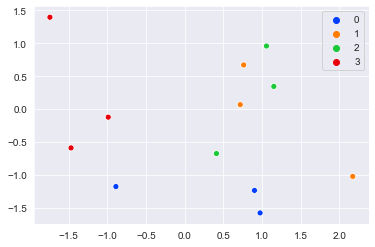

In [79]:
sns.scatterplot(X[:,0], X[:,1], hue=Y, palette='bright')

In [80]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage

dm = pdist(X)
Z = linkage(dm, method='ward')

In [81]:
len(X)

12

In [82]:
Z

array([[ 1.        ,  3.        ,  0.34900752,  2.        ],
       [ 0.        ,  9.        ,  0.41204436,  2.        ],
       [ 4.        , 10.        ,  0.51454316,  2.        ],
       [ 5.        ,  8.        ,  0.66988538,  2.        ],
       [13.        , 14.        ,  0.86079415,  4.        ],
       [ 7.        , 15.        ,  1.02515372,  3.        ],
       [ 2.        , 12.        ,  1.04098699,  3.        ],
       [11.        , 18.        ,  1.73544007,  4.        ],
       [ 6.        , 17.        ,  2.59429215,  4.        ],
       [16.        , 19.        ,  3.2962712 ,  8.        ],
       [20.        , 21.        ,  5.30662166, 12.        ]])

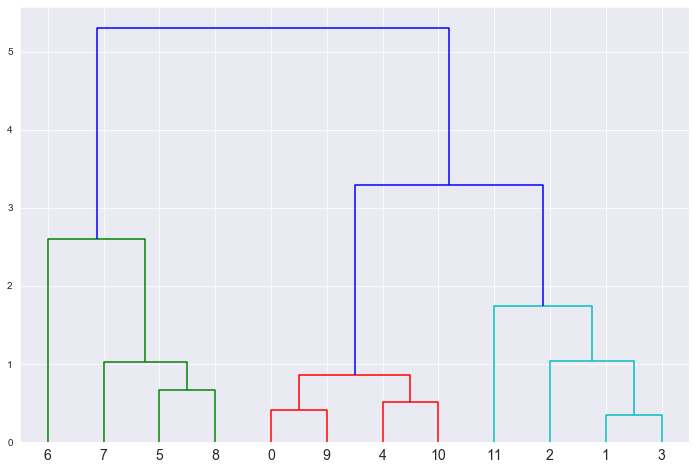

In [83]:
from scipy.cluster.hierarchy import dendrogram

fig, ax = plt.subplots(figsize=(12, 8))
d = dendrogram(Z, show_leaf_counts=False, color_threshold=3, leaf_font_size=14, ax=ax)
plt.show()

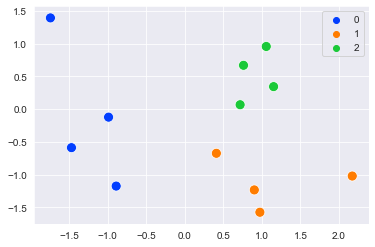

In [84]:
from sklearn.cluster import AgglomerativeClustering

y_preds = AgglomerativeClustering(n_clusters=None, distance_threshold=3.0).fit_predict(X)
sns.scatterplot(X[:,0], X[:,1], hue=y_preds, palette='bright', s=100)

### Connectivity constraints

An important feature of agglomerative hierarchical clustering is the possibility to include connectivity constraints to force the merging of specific samples. This kind of prior knowledge is very common in contexts where there are strong relationships between neighbors or when we know that some samples must belong to the same cluster because of their intrinsic properties. To achieve this goal, we need to use a **connectivity matrix** $A \in \{0,1\}^{n \times n}$:

$$
A_{ij} =
  \begin{cases}
    [1]   & \quad \text{if } \bar{x}_i \text{ and } \bar{x}_j \text{ are even}\\
    [0]   & \quad \text{otherwise}
  \end{cases}
$$

In general, A is the adjacency matrix induced by a graph of the dataset; however, the only important requirement is the absence of isolated samples (without connections), because they cannot be merged in any way. The connectivity matrix is applied during the initial merging stages and forces the algorithm to aggregate the specified samples. As the following agglomerations don't impact on connectivity (two merged samples or clusters will remain merged until the end of the process), the constraints are always enforced.

In [85]:
from sklearn.neighbors import kneighbors_graph

In [86]:
cma = kneighbors_graph(X, n_neighbors=2)
cma

<12x12 sparse matrix of type '<class 'numpy.float64'>'
	with 24 stored elements in Compressed Sparse Row format>

In [87]:
ag = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average', connectivity=cma)
Y_pred = ag.fit_predict(X)
Y_pred

C:\Users\Sina\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:478: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)


array([0, 0, 0, 0, 0, 2, 1, 2, 2, 0, 0, 0], dtype=int64)

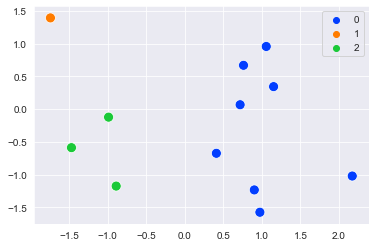

In [88]:
sns.scatterplot(X[:,0], X[:,1], hue=Y_pred, palette='bright', s=100)

# Anomaly Detection 

### Kernel Density Estimation

In [103]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)

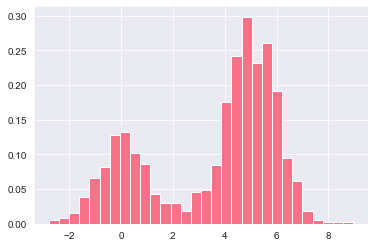

In [107]:
hist = plt.hist(x, bins=30, density=True)

***

In [101]:
import numpy as np

nb_samples = [1000, 800, 500, 380, 280, 150, 120, 100, 50, 30]

ages = []

for n in nb_samples:
    i = np.random.uniform(10, 80, size=2)
    a = np.random.uniform(i[0], i[1], size=n).astype(np.int32)
    ages.append(a)
    
ages = np.concatenate(ages)

In [91]:
from sklearn.neighbors import KernelDensity

kd_gaussian = KernelDensity(kernel='gaussian', bandwidth=2.0)
kd_epanechnikov = KernelDensity(kernel='epanechnikov', bandwidth=2.0)
kd_exponential = KernelDensity(kernel='exponential', bandwidth=2.0)

kd_gaussian.fit(ages.reshape(-1, 1))
kd_epanechnikov.fit(ages.reshape(-1, 1))
kd_exponential.fit(ages.reshape(-1, 1))

KernelDensity(algorithm='auto', atol=0, bandwidth=2.0, breadth_first=True,
              kernel='exponential', leaf_size=40, metric='euclidean',
              metric_params=None, rtol=0)

In [89]:
test_data = np.array([12, 15, 18, 20, 25, 30, 40, 50, 55, 60, 65, 70, 75, 80, 85, 90]).reshape(-1, 1)
test_data

array([[12],
       [15],
       [18],
       [20],
       [25],
       [30],
       [40],
       [50],
       [55],
       [60],
       [65],
       [70],
       [75],
       [80],
       [85],
       [90]])

In [93]:
test_data.shape

(16, 1)

In [94]:
np.squeeze(test_data).shape

(16,)

In [96]:
test_densities_epanechnikov = np.exp(kd_epanechnikov.score_samples(test_data))
test_densities_gaussian = np.exp(kd_gaussian.score_samples(test_data))

for age, density in zip(np.squeeze(test_data), test_densities_epanechnikov):
    print('p(age = {:d}) = {:.7f} ({})'.format(age, density, 'Anomaly' if density < 0.005 else 'Normal'))

p(age = 12) = 0.0000000 (Anomaly)
p(age = 15) = 0.0000000 (Anomaly)
p(age = 18) = 0.0006873 (Anomaly)
p(age = 20) = 0.0032991 (Anomaly)
p(age = 25) = 0.0101723 (Normal)
p(age = 30) = 0.0134164 (Normal)
p(age = 40) = 0.0155609 (Normal)
p(age = 50) = 0.0106946 (Normal)
p(age = 55) = 0.0299120 (Normal)
p(age = 60) = 0.0461877 (Normal)
p(age = 65) = 0.0072306 (Normal)
p(age = 70) = 0.0206470 (Normal)
p(age = 75) = 0.0015396 (Anomaly)
p(age = 80) = 0.0004124 (Anomaly)
p(age = 85) = 0.0000000 (Anomaly)
p(age = 90) = 0.0000000 (Anomaly)


### KDD Cup

In [161]:
from sklearn.datasets import fetch_kddcup99

kddcup99 = fetch_kddcup99(subset='http', percent10=True, random_state=1000)

X = kddcup99['data'].astype(np.float64)
Y = kddcup99['target']

print('Statuses: {}'.format(np.unique(Y)))
print('Normal samples: {}'.format(X[Y == b'normal.'].shape[0]))
print('Anomalies: {}'.format(X[Y != b'normal.'].shape[0]))

Statuses: [b'back.' b'ipsweep.' b'normal.' b'phf.' b'satan.']
Normal samples: 56516
Anomalies: 2209


In [114]:
X.shape

(58725, 3)

In [116]:
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)
IQRs = np.percentile(X, 75, axis=0) - np.percentile(X, 25, axis=0)

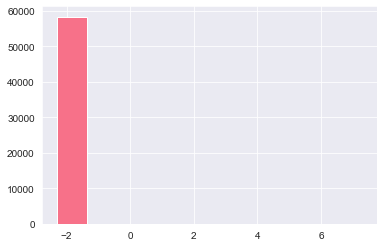

In [120]:
plt.hist(X[:,0], bins=10); plt.show()

#### Two methods to determine a good bandwidth

First based on standard deviation:

$$
h = 1.06 \cdot std(X) \cdot m^{-0.2}
$$

Second based on IQR:

$$
h = 0.9 \cdot min \left( std(X), \frac{IQR}{1.34} \right) \cdot m^{-0.2}
$$


In [121]:
# Computing bandwidth
N = float(X.shape[0])

h0 = 0.9 * np.min([stds[0], IQRs[0] / 1.34]) * np.power(N, -0.2)
h1 = 0.9 * np.min([stds[1], IQRs[1] / 1.34]) * np.power(N, -0.2)
h2 = 0.9 * np.min([stds[2], IQRs[2] / 1.34]) * np.power(N, -0.2)

print('h0 = {:.3f}, h1 = {:.3f}, h2 = {:.3f}'.format(h0, h1, h2))

h0 = 0.000, h1 = 0.026, h2 = 0.133


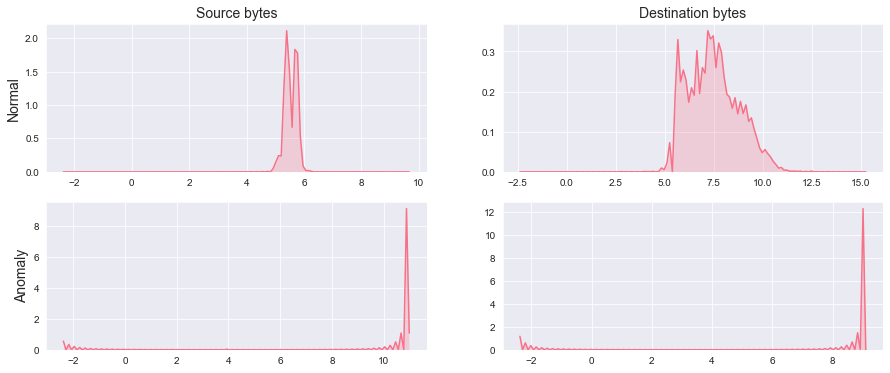

In [150]:
fig, ax = plt.subplots(2, 2, figsize=(15, 6))

sns.kdeplot(X[Y == b'normal.', 1], shade=True, bw=0.026, ax=ax[0,0])
sns.kdeplot(X[Y == b'normal.', 2], shade=True, bw=0.026, ax=ax[0,1])

sns.kdeplot(X[Y != b'normal.', 1], shade=True, bw=0.026, ax=ax[1,0])
sns.kdeplot(X[Y != b'normal.', 2], shade=True, bw=0.026, ax=ax[1,1])

ax[0,0].set_ylabel('Normal', fontsize=14)
ax[1,0].set_ylabel('Anomaly', fontsize=14)

ax[0,0].set_title('Source bytes', fontsize=14)
ax[0,1].set_title('Destination bytes', fontsize=14)

plt.show()

In [162]:
# drop the duration feature as it is useless (contains all zeros)
X = X[:, 1:]
X.shape

(58725, 2)

In [163]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=0.026)
kde.fit(X[Y == b'normal.'])

# Compute densities
Yn = np.exp(kde.score_samples(X[Y == b'normal.']))
Ya = np.exp(kde.score_samples(X[Y != b'normal.']))

print('Mean normal: {:.5f} - Std: {:.5f}'.format(np.mean(Yn), np.std(Yn)))
print('Mean anomalies: {:.5f} - Std: {:.5f}'.format(np.mean(Ya), np.std(Ya)))

Mean normal: 0.39318 - Std: 0.25293
Mean anomalies: 0.00007 - Std: 0.00346


In [164]:
np.median(Yn)

0.3556719907040098